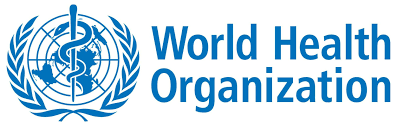

# WHO Life Expectancy Model and Feature Engineering

## Importing Packages and Data

In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tools
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
new = pd.read_csv('Life-Expectancy-Data-Updated.csv')
new.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


# Modelling

#### Test/Train Split

In [3]:
feature_cols = list(new.columns)
feature_cols.remove('Life_expectancy')

In [4]:
X = new[feature_cols]
y = new['Life_expectancy']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

## Feature Engineering Function

In [6]:
def feature_eng (df):
    df = df.copy()
    columns_to_scale = list(df.columns)     # Selecting columns that need to be scaled
    if 'Country' in columns_to_scale:
        columns_to_scale.remove('Country')  # Removing columns that can't be scaled
    if 'Region' in columns_to_scale:
        columns_to_scale.remove('Region')
    if 'Economy_status_Developed' in columns_to_scale:
        columns_to_scale.remove('Economy_status_Developed')
    if 'Economy_status_Developing' in columns_to_scale:
        columns_to_scale.remove('Economy_status_Developing')
    df_scale = df[columns_to_scale]         # Creating the dataframe that is to be scaled
    rob = RobustScaler()
    rob_scaler = rob.fit(df_scale)          # Fitting the data into robust scaler
    df_scale_rob = rob_scaler.transform(df_scale)   # Transforming the data with robust scaler
    df[columns_to_scale] = df_scale_rob
    df = sm.add_constant(df)                # Adding constant to the dataframe
    return df, rob_scaler

##### Applying Feature Engineering to Train data

In [7]:
X_train_fe, rob_train = feature_eng(X_train)
X_train_fe

,const,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,...,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
496,1.0,Denmark,European Union,0.666667,-0.415190,-0.337434,-0.669256,0.850153,-0.055556,0.034483,...,0.0625,0.0625,-0.307692,4.550830,-0.100294,-0.392857,-0.428571,0.961538,1,0
870,1.0,Grenada,Central America and Caribbean,-0.555556,-0.187342,-0.149385,0.056856,0.902141,0.444444,-0.517241,...,0.3125,0.2500,0.615385,0.330536,-0.350576,0.125000,0.142857,-0.038462,0,1
2467,1.0,Ecuador,South America,-0.777778,0.088608,0.082601,-0.049927,0.030581,-1.111111,0.413793,...,-0.1875,-0.2500,0.153846,0.014240,0.228145,-0.303571,-0.321429,-0.153846,0,1
2658,1.0,Bosnia and Herzegovina,Rest of Europe,0.666667,-0.364557,-0.297012,-0.468872,0.107034,0.000000,0.310345,...,-0.4375,-0.4375,-0.205128,0.034892,-0.197877,-0.160714,-0.160714,0.269231,0,1
87,1.0,Solomon Islands,Oceania,-0.888889,0.144304,0.130053,0.458844,-0.501529,-0.444444,-0.620690,...,-0.3125,-0.4375,0.025641,-0.208318,-0.336571,-0.339286,-0.339286,-0.615385,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,1.0,Gabon,Africa,0.555556,0.455696,0.555360,0.619211,0.547401,-0.555556,-0.655172,...,-1.0000,-0.8750,3.102564,0.297718,-0.272871,0.517857,0.500000,0.057692,0,1
2454,1.0,Trinidad and Tobago,Central America and Caribbean,-0.555556,0.101266,0.065026,0.179685,0.221713,-0.722222,-0.344828,...,-0.1250,-0.1250,0.615385,0.886835,-0.297267,0.553571,0.642857,0.326923,0,1
1292,1.0,France,European Union,0.222222,-0.425316,-0.335677,-0.559941,1.270642,-1.333333,-0.758621,...,0.3750,0.3750,-0.153846,2.969823,2.582787,-0.482143,-0.482143,0.596154,1,0
1368,1.0,Uruguay,South America,-0.666667,-0.146835,-0.124780,-0.302020,0.319572,0.333333,0.310345,...,0.0000,0.1250,0.051282,0.450868,-0.204653,-0.285714,-0.285714,0.038462,0,1


### Calculating VIF Values

#### During EDA it was noted that there was the potential for multicollinearity due to the correlation between different columns, so we used the VIF function below to help to identify the best columns to use to avoid this issue.

In [8]:
def calculate_vif(X, thresh = 10.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [9]:
calculate_vif(X_train_fe[['const', 'Year', 'Infant_deaths', 'Under_five_deaths',
                          'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
                          'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
                          'Population_mln', 'Thinness_ten_nineteen_years',
                          'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
                          'Economy_status_Developing']])

C:\Users\lawre\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\lawre\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'Economy_status_Developed' at index: 17
dropping 'Under_five_deaths' at index: 3
dropping 'const' at index: 0
dropping 'Diphtheria' at index: 8
dropping 'Thinness_ten_nineteen_years' at index: 11
Remaining variables:
Index(['Year', 'Infant_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_five_nine_years',
       'Schooling', 'Economy_status_Developing'],
      dtype='object')


,Year,Infant_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_five_nine_years,Schooling,Economy_status_Developing
496,0.666667,-0.415190,-0.669256,0.850153,-0.055556,0.034483,-0.064516,0.0625,-0.307692,4.550830,-0.100294,-0.428571,0.961538,0
870,-0.555556,-0.187342,0.056856,0.902141,0.444444,-0.517241,0.064516,0.3125,0.615385,0.330536,-0.350576,0.142857,-0.038462,1
2467,-0.777778,0.088608,-0.049927,0.030581,-1.111111,0.413793,-0.032258,-0.1875,0.153846,0.014240,0.228145,-0.321429,-0.153846,1
2658,0.666667,-0.364557,-0.468872,0.107034,0.000000,0.310345,0.032258,-0.4375,-0.205128,0.034892,-0.197877,-0.160714,0.269231,1
87,-0.888889,0.144304,0.458844,-0.501529,-0.444444,-0.620690,-0.193548,-0.3125,0.025641,-0.208318,-0.336571,-0.339286,-0.615385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,0.555556,0.455696,0.619211,0.547401,-0.555556,-0.655172,-0.161290,-1.0000,3.102564,0.297718,-0.272871,0.500000,0.057692,1
2454,-0.555556,0.101266,0.179685,0.221713,-0.722222,-0.344828,0.225806,-0.1250,0.615385,0.886835,-0.297267,0.642857,0.326923,1
1292,0.222222,-0.425316,-0.559941,1.270642,-1.333333,-0.758621,-0.129032,0.3750,-0.153846,2.969823,2.582787,-0.482143,0.596154,0
1368,-0.666667,-0.146835,-0.302020,0.319572,0.333333,0.310345,0.161290,0.0000,0.051282,0.450868,-0.204653,-0.285714,0.038462,1


##### After consulting the VIF table we decided to take the columns with a VIF value of less than ten for our model, except for the 'Year' column that we considered unnecessary for the purposes of modeling Life Expectancy

## Best Model

#### Columns removed due to recommendation from VIF table - Thinness ten to nineteen, Economy status Developed, Under Five Deaths, Diphtheria

#### Columns removed due to Ethical considerations - Economic status Developing as this is quite a binary and political definition

#### Columns removed due to too high P-Value - Measles and Population

### Feature Engineering Best Model Train Data

In [10]:
feature_cols_best = [ 'const','Infant_deaths', 'Adult_mortality', 'Alcohol_consumption',
                      'Hepatitis_B', 'BMI', 'Polio', 'Incidents_HIV',
                      'GDP_per_capita', 'Thinness_five_nine_years',
                      'Schooling']

In [11]:
X_train_fe_best, rob_best = feature_eng(X_train[feature_cols_best[1:]])    # Feature Engineering our Train Data
X_train_fe_best

,const,Infant_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,BMI,Polio,Incidents_HIV,GDP_per_capita,Thinness_five_nine_years,Schooling
496,1.0,-0.415190,-0.669256,0.850153,-0.055556,-0.064516,0.0625,-0.307692,4.550830,-0.428571,0.961538
870,1.0,-0.187342,0.056856,0.902141,0.444444,0.064516,0.3125,0.615385,0.330536,0.142857,-0.038462
2467,1.0,0.088608,-0.049927,0.030581,-1.111111,-0.032258,-0.1875,0.153846,0.014240,-0.321429,-0.153846
2658,1.0,-0.364557,-0.468872,0.107034,0.000000,0.032258,-0.4375,-0.205128,0.034892,-0.160714,0.269231
87,1.0,0.144304,0.458844,-0.501529,-0.444444,-0.193548,-0.3125,0.025641,-0.208318,-0.339286,-0.615385
...,...,...,...,...,...,...,...,...,...,...,...
2375,1.0,0.455696,0.619211,0.547401,-0.555556,-0.161290,-1.0000,3.102564,0.297718,0.500000,0.057692
2454,1.0,0.101266,0.179685,0.221713,-0.722222,0.225806,-0.1250,0.615385,0.886835,0.642857,0.326923
1292,1.0,-0.425316,-0.559941,1.270642,-1.333333,-0.129032,0.3750,-0.153846,2.969823,-0.482143,0.596154
1368,1.0,-0.146835,-0.302020,0.319572,0.333333,0.161290,0.0000,0.051282,0.450868,-0.285714,0.038462


##### Fitting the model to our train data

In [12]:
lin_reg_best = sm.OLS(y_train, X_train_fe_best[feature_cols_best])    # Defining the Linear Regression Model with training data
results_best = lin_reg_best.fit()

In [13]:
results_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.003e+04
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:18:04   Log-Likelihood:                -4032.6
No. Observations:                2291   AIC:                             8087.
Df Residuals:                    2280   BIC:                             8150.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       71.3386      0.042   1701.289      0.000      71.256      71.421
Infant_deaths               -5.0850      0.117    -43.394      0.000      -5.315      -4.855
Adult_mortality             -7.0144      0.098    -71.568      0.000      -7.207      -6.822
Alcohol_consumption          0.5001      0.067      7.489      0.000       0.369       0.631
Hepatitis_B                 -0.2210      0.047     -4.705      0.000      -0.313      -0.129
BMI                         -0.4468      0.066     -6.761      0.000      -0.576      -0.317
Polio                        0.2135      0.058      3.707      0.000       0.101       0.326
Incidents_HIV                0.0348      0.009      4.081      0.000       0.018       0.052
GDP_per_capita               0.2679      0.026     10.459      0.000       0.218       0.318
Thinness_five_nine_years    -0.1203      0.049     -2.434      0.015      -0.217      -0.023
Schooling                    0.7815      0.097      8.018      0.000       0.590       0.973
==============================================================================
Omnibus:                        6.060   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.153
Skew:                          -0.038   Prob(JB):                       0.0760
Kurtosis:                       2.781   Cond. No.                         30.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Defining a function for our models

In [14]:
def model(df, results):            # Using the model we predict the y-value of the dataframe
    y_pred = results.predict(df)
    return y_pred

#### RMSE Train Data

In [15]:
y_pred_best = model(X_train_fe_best, results_best)                       # Using our model function to get predictions from Train Data
rmse_best = statsmodels.tools.eval_measures.rmse(y_train, y_pred_best)   # Calculating the RMSE of Train Data
print(rmse_best)

1.4066951200436648


#### RMSE Test Data

In [16]:
X_test_fe = rob_best.transform(X_test[feature_cols_best[1:]])          # Scaling Test Data using Training Data scaler
X_test_fe_best = pd.DataFrame(X_test_fe,columns=feature_cols_best[1:])   # Turning it into a Dataframe
X_test_fe_best.insert(loc=0, column='const', value=1.0)                # Adding Constant

In [17]:
y_pred_best = model(X_test_fe_best, results_best)                      # Using model on Test Data
rmse_best = statsmodels.tools.eval_measures.rmse(y_test, y_pred_best)  # Calculating RMSE of Test Data
print(rmse_best)

1.440408196066944


## Least Model

##### For the least model we had to decide on columns that some nations may consider to have sensitive information.
##### We used the pattern of nulls in the original data set to decide which ones nations deemed as sensitive.
##### There were null patterns regarding GDP, various disease related columns and Schooling, so our least model doesn't include these five columns.

#### Feature Engineering Least Model

In [18]:
feature_cols_least = ['const', 'Infant_deaths', 'Adult_mortality', 'Alcohol_consumption', 'BMI', 'Thinness_five_nine_years']

In [19]:
# feature_cols_least = ['const', 'Infant_deaths', 'Adult_mortality'] ## This shows how much of an impact these two columns have on LE due to have LE is calculated

In [20]:
X_train_fe_least, rob_least = feature_eng(X_train[feature_cols_least[1:]])         # Feature Engineering our Train Data
X_train_fe_least

,const,Infant_deaths,Adult_mortality,Alcohol_consumption,BMI,Thinness_five_nine_years
496,1.0,-0.415190,-0.669256,0.850153,-0.064516,-0.428571
870,1.0,-0.187342,0.056856,0.902141,0.064516,0.142857
2467,1.0,0.088608,-0.049927,0.030581,-0.032258,-0.321429
2658,1.0,-0.364557,-0.468872,0.107034,0.032258,-0.160714
87,1.0,0.144304,0.458844,-0.501529,-0.193548,-0.339286
...,...,...,...,...,...,...
2375,1.0,0.455696,0.619211,0.547401,-0.161290,0.500000
2454,1.0,0.101266,0.179685,0.221713,0.225806,0.642857
1292,1.0,-0.425316,-0.559941,1.270642,-0.129032,-0.482143
1368,1.0,-0.146835,-0.302020,0.319572,0.161290,-0.285714


#### Fitting our model to Train data

In [21]:
lin_reg_least = sm.OLS(y_train, X_train_fe_least[feature_cols_least])     # Defining the Linear Regression Model with training data
results_least = lin_reg_least.fit()

In [22]:
results_least.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.746e+04
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:18:05   Log-Likelihood:                -4190.8
No. Observations:                2291   AIC:                             8394.
Df Residuals:                    2285   BIC:                             8428.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       71.6567      0.039   1843.471      0.000      71.580      71.733
Infant_deaths               -5.6945      0.092    -62.054      0.000      -5.874      -5.515
Adult_mortality             -6.8956      0.064   -107.768      0.000      -7.021      -6.770
Alcohol_consumption          0.9653      0.063     15.344      0.000       0.842       1.089
BMI                         -0.3217      0.067     -4.810      0.000      -0.453      -0.191
Thinness_five_nine_years    -0.1960      0.052     -3.786      0.000      -0.297      -0.094
==============================================================================
Omnibus:                       10.794   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.305
Skew:                          -0.036   Prob(JB):                       0.0157
Kurtosis:                       2.714   Cond. No.                         5.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### RMSE Train Data

In [23]:
y_pred_least = model(X_train_fe_least, results_least)                    # Using our model function to get predictions from Train Data
rmse_least = statsmodels.tools.eval_measures.rmse(y_train, y_pred_least) # Calculating the RMSE of Train Data
print(rmse_least)

1.5072643164796578


#### RMSE Test Data

In [24]:
X_test_fe = rob_least.transform(X_test[feature_cols_least[1:]])          # Scaling Test Data using Training Data scaler
X_test_fe_least = pd.DataFrame(X_test_fe,columns=feature_cols_least[1:]) # Turning it into a Dataframe
X_test_fe_least.insert(loc=0, column='const', value=1.0)                 # Adding Constant

In [25]:
y_pred_least = model(X_test_fe_least[feature_cols_least], results_least) # Using our model function to get predictions from Test Data
rmse_least = statsmodels.tools.eval_measures.rmse(y_test, y_pred_least)  # Calculating RMSE of Test Data
print(rmse_least)

1.499878349366194


### The Function

##### Input values function that takes the input columns, our scaler and the relevant model, returns the predicted y-value

In [26]:
def input_values(feature_cols, rob, results):
    list1=[]
    for i in range(len(feature_cols)):                  # loop that asks for the input based on the feature columns
        b = float(input(f'Enter {feature_cols[i]}'))
        list1.append(b)
    df = pd.DataFrame([list1],columns=feature_cols)     # Creating a Dataframe from the list of inputs
    df_scaled = rob.transform(df)                       # Scaling the inputs to fit the model scaling
    df = pd.DataFrame(df_scaled,columns=feature_cols)
    df.insert(loc=0, column='const', value=1.0)         # Adding the constant
    pred = model(df, results)                           # Predicting the life expectancy
    return (pred[0])

##### Model Input function that asks the user for their model of choice

In [27]:
def model_input(feature_cols_least, rob_least, feature_cols_best, rob_best ):
    a = input('Do you consent to using advanced population data, which may include protected information, for better accuracy? Y/N')  # Asking the required question
    if a=='N' or a=='n':                                                      # No branch, taking to least model
        pred = input_values(feature_cols_least[1:], rob_least, results_least)
        print (pred)
    elif a=='Y' or a=='y':                                                    # Yes branch, taking to best model
        pred = input_values(feature_cols_best[1:], rob_best, results_best)
        print (pred)
    else:
        print ('Incorrect input')                                             # Prompt if input not correct